In [1]:
import nltk
import pandas as pd
import numpy as np
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\aidan\Anaconda3\envs\DSI-6\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
all_posts = pd.read_csv('./all_posts_scraped_clean_50')

In [3]:
all_posts.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
all_posts.head()

,author,body,id,subreddit,title
0,kinspace,I'm curious as to what draws in the average pe...,abcly6,AskMen,For anyone that's paid for pics/premium Snapch...
1,RisenFlames,Just for context this is my first time using a...,abcmsv,AskMen,Why do men ghost then message again after awhile?
2,MediocrePenisNumber6,I'm not trying to offend anyone I just want to...,abcrua,AskMen,Guys who where the school pretty boy and guys ...
3,Greatpocketlintking,GF found out I use mine on my whole body and s...,abcxuj,AskMen,Men of reddit who use a loofah in the shower; ...
4,Cheetobear6891,Or is it time to go joe rogan on this shit?,abd0u0,AskMen,What has been your experience with hair loss t...


In [5]:
all_posts['target'] = all_posts['subreddit'].map(lambda x: 1 if x == 'AskWomen' else 0)

In [6]:
tokenizer = RegexpTokenizer(r'\b\S+\b|\$[\d\.]+')

In [7]:
body_words = []
body_words_lem = []
for i in all_posts['body']:
    post_tokens = tokenizer.tokenize(i.lower())
    post_lem = [lemmatizer.lemmatize(token) for token in post_tokens]    
    post_tokens = ' '.join(post_tokens)
    post_lem = ' '.join(post_lem)
    body_words.append(post_tokens)
    body_words_lem.append(post_lem)

In [8]:
all_posts['body_words'] = body_words
all_posts['body_words_lem'] = body_words_lem

In [9]:
all_posts.tail()

,author,body,id,subreddit,title,target,body_words,body_words_lem
50017,lina101176,mine: I once leaked onto my friend's sheets du...,4xw4t1,AskWomen,"Ladies with periods, what's your most embarras...",1,mine i once leaked onto my friend's sheets dur...,mine i once leaked onto my friend's sheet duri...
50018,prototagonist,Background: Although less today than in the pa...,4xwepc,AskWomen,"Other than listening, what's a good way a man ...",1,background although less today than in the pas...,background although le today than in the past ...
50019,MissFegg,I'm thinking of going alone to Miami in a mont...,4xwevr,AskWomen,How's Miami for women traveling alone?,1,i'm thinking of going alone to miami in a mont...,i'm thinking of going alone to miami in a mont...
50020,nacho-average-food,"I'm a teen guy, and was recently having a conv...",4xwgin,AskWomen,How can men be less passively threatening?,1,i'm a teen guy and was recently having a conve...,i'm a teen guy and wa recently having a conver...
50021,itsadooozy,Just made a double batch of gnocchi and they'r...,4xwk4j,AskWomen,What was your greatest creation in the kitchen...,1,just made a double batch of gnocchi and they'r...,just made a double batch of gnocchi and they'r...


In [10]:
title_words = []
title_words_lem = []
for i in all_posts['title']:
    post_tokens = tokenizer.tokenize(i.lower())
    post_lem = [lemmatizer.lemmatize(token) for token in post_tokens]
    post_tokens = ' '.join(post_tokens)
    post_lem = ' '.join(post_lem)
    title_words.append(post_tokens)
    title_words_lem.append(post_lem)

In [11]:
all_posts['title_words'] = title_words
all_posts['title_words_lem'] = title_words_lem

In [12]:
all_posts.tail()

,author,body,id,subreddit,title,target,body_words,body_words_lem,title_words,title_words_lem
50017,lina101176,mine: I once leaked onto my friend's sheets du...,4xw4t1,AskWomen,"Ladies with periods, what's your most embarras...",1,mine i once leaked onto my friend's sheets dur...,mine i once leaked onto my friend's sheet duri...,ladies with periods what's your most embarrass...,lady with period what's your most embarrassing...
50018,prototagonist,Background: Although less today than in the pa...,4xwepc,AskWomen,"Other than listening, what's a good way a man ...",1,background although less today than in the pas...,background although le today than in the past ...,other than listening what's a good way a man c...,other than listening what's a good way a man c...
50019,MissFegg,I'm thinking of going alone to Miami in a mont...,4xwevr,AskWomen,How's Miami for women traveling alone?,1,i'm thinking of going alone to miami in a mont...,i'm thinking of going alone to miami in a mont...,how's miami for women traveling alone,how's miami for woman traveling alone
50020,nacho-average-food,"I'm a teen guy, and was recently having a conv...",4xwgin,AskWomen,How can men be less passively threatening?,1,i'm a teen guy and was recently having a conve...,i'm a teen guy and wa recently having a conver...,how can men be less passively threatening,how can men be le passively threatening
50021,itsadooozy,Just made a double batch of gnocchi and they'r...,4xwk4j,AskWomen,What was your greatest creation in the kitchen...,1,just made a double batch of gnocchi and they'r...,just made a double batch of gnocchi and they'r...,what was your greatest creation in the kitchen...,what wa your greatest creation in the kitchen ...


In [13]:
all_posts['joint_words'] = all_posts['body_words'] + ' ' + all_posts['title_words']
all_posts['joint_words_lem'] = all_posts['body_words_lem'] + ' ' + all_posts['title_words_lem']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(all_posts.drop('target', axis=1), all_posts['target'], stratify=all_posts['target'], random_state=42)

In [15]:
X_test.count()

author             12506
body               12506
id                 12506
subreddit          12506
title              12506
body_words         12506
body_words_lem     12506
title_words        12506
title_words_lem    12506
joint_words        12506
joint_words_lem    12506
dtype: int64

In [16]:
y_test.value_counts()

0    6256
1    6250
Name: target, dtype: int64

In [17]:
X_train.dtypes

author             object
body               object
id                 object
subreddit          object
title              object
body_words         object
body_words_lem     object
title_words        object
title_words_lem    object
joint_words        object
joint_words_lem    object
dtype: object

## Count Vectorizer / Bag of Words

In [18]:
vectorizer = CountVectorizer(stop_words='english')

### Logistic Regression

In [19]:
lr = LogisticRegression()

#### Tokenized

In [20]:
X_train_features = vectorizer.fit_transform(X_train['joint_words'])
X_train_features = X_train_features.toarray()

lr.fit(X_train_features, y_train)

lr.score(X_train_features, y_train)

0.8844226463375626

In [21]:
cross_val_score(lr, X_train_features, y_train).mean()

0.7246508060244103

In [22]:
X_test_features = vectorizer.transform(X_test['joint_words'])
X_test_features = X_test_features.toarray()

lr.score(X_test_features, y_test)


0.7351671197825044

#### Lemmatized

In [23]:
X_train_features = vectorizer.fit_transform(X_train['joint_words_lem'])
X_train_features = X_train_features.toarray()

lr.fit(X_train_features, y_train)

lr.score(X_train_features, y_train)

0.8712282759356008

In [24]:
cross_val_score(lr, X_train_features, y_train).mean()

0.7171339598922413

In [25]:
X_test_features = vectorizer.transform(X_test['joint_words_lem'])
X_test_features = X_test_features.toarray()

lr.score(X_test_features, y_test)

0.7179753718215257

### Random Forrest

#### Tokenized

In [22]:
rf = RandomForestClassifier()

In [27]:
X_train_features = vectorizer.fit_transform(X_train['joint_words'])
X_train_features = X_train_features.toarray()

rf.fit(X_train_features, y_train)

rf.score(X_train_features, y_train)

0.9869122507730035

In [28]:
cross_val_score(rf, X_train_features, y_train).mean()

0.6955698215409715

In [29]:
X_test_features = vectorizer.transform(X_test['joint_words'])
X_test_features = X_test_features.toarray()

rf.score(X_test_features, y_test)

0.7106988645450184

#### Lemmatized

In [30]:
X_train_features = vectorizer.fit_transform(X_train['joint_words_lem'])
X_train_features = X_train_features.toarray()

rf.fit(X_train_features, y_train)

rf.score(X_train_features, y_train)

0.9875253225290542

In [31]:
cross_val_score(rf, X_train_features, y_train).mean()

0.6885328474292889

In [32]:
X_test_features = vectorizer.transform(X_test['joint_words_lem'])
X_test_features = X_test_features.toarray()

rf.score(X_test_features, y_test)

0.6927874620182313

## TFIDF

In [20]:
vectorizer = TfidfVectorizer(stop_words='english')

### Logistic Regression

#### Tokenized

In [34]:
X_train_features = vectorizer.fit_transform(X_train['joint_words'])
X_train_features = X_train_features.toarray()

lr.fit(X_train_features, y_train)

lr.score(X_train_features, y_train)

0.8209563919394391

In [35]:
cross_val_score(lr, X_train_features, y_train).mean()

0.7503197835957041

In [36]:
X_test_features = vectorizer.transform(X_test['joint_words'])
X_test_features = X_test_features.toarray()

lr.score(X_test_features, y_test)

0.7595554134015673

#### Lemmatized

In [37]:
X_train_features = vectorizer.fit_transform(X_train['joint_words_lem'])
X_train_features = X_train_features.toarray()

lr.fit(X_train_features, y_train)

lr.score(X_train_features, y_train)

0.8085616803497174

In [38]:
cross_val_score(lr, X_train_features, y_train).mean()

0.7402173967024951

In [39]:
X_test_features = vectorizer.transform(X_test['joint_words_lem'])
X_test_features = X_test_features.toarray()

lr.score(X_test_features, y_test)

0.7474012474012474

### Random Forrest

#### Tokenized

In [40]:
X_train_features = vectorizer.fit_transform(X_train['joint_words'])
X_train_features = X_train_features.toarray()

rf.fit(X_train_features, y_train)

rf.score(X_train_features, y_train)

0.9867256637168141

In [41]:
cross_val_score(rf, X_train_features, y_train).mean()

0.7042061154108644

In [42]:
X_test_features = vectorizer.transform(X_test['joint_words'])
X_test_features = X_test_features.toarray()

rf.score(X_test_features, y_test)

0.7049416280185511

#### Lemmatized

In [23]:
X_train_features = vectorizer.fit_transform(X_train['joint_words_lem'])
X_train_features = X_train_features.toarray()

rf.fit(X_train_features, y_train)

rf.score(X_train_features, y_train)

0.9865923872481075

In [44]:
cross_val_score(rf, X_train_features, y_train).mean()

0.6836017573353409

In [45]:
X_test_features = vectorizer.transform(X_test['joint_words_lem'])
X_test_features = X_test_features.toarray()

rf.score(X_test_features, y_test)

0.6909483447944986

The TFIDF vectorizer looks to be much more accurate and actually seems to perform better without lemmatizing the words.  

## Grid Searching for Hyperparameters

In [18]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_features = vectorizer.fit_transform(X_train['joint_words'])
X_train_features = X_train_features.toarray()

In [25]:
lr = LogisticRegression()

In [26]:
log_reg_params = {
    'penalty' : ['l1', 'l2'],
    'C' : [0.2, 0.4, 0.6, 0.8, 1]
}

grid = GridSearchCV(
    LogisticRegression(),
    log_reg_params,
    cv = 5,
    verbose = 2,
    return_train_score = True)

In [27]:
grid.fit(X_train_features, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] C=0.2, penalty=l1 ...............................................
[CV] ................................ C=0.2, penalty=l1, total= 1.0min
[CV] C=0.2, penalty=l1 ...............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.1min remaining:    0.0s


[CV] ................................ C=0.2, penalty=l1, total= 1.1min
[CV] C=0.2, penalty=l1 ...............................................
[CV] ................................ C=0.2, penalty=l1, total= 3.6min
[CV] C=0.2, penalty=l1 ...............................................
[CV] ................................ C=0.2, penalty=l1, total= 1.1min
[CV] C=0.2, penalty=l1 ...............................................
[CV] ................................ C=0.2, penalty=l1, total= 1.2min
[CV] C=0.2, penalty=l2 ...............................................
[CV] ................................ C=0.2, penalty=l2, total= 1.3min
[CV] C=0.2, penalty=l2 ...............................................
[CV] ................................ C=0.2, penalty=l2, total= 1.1min
[CV] C=0.2, penalty=l2 ...............................................
[CV] ................................ C=0.2, penalty=l2, total=  50.9s
[CV] C=0.2, penalty=l2 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 60.6min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.2, 0.4, 0.6, 0.8, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [28]:
grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
grid.best_params_

{'C': 1, 'penalty': 'l2'}

In [30]:
grid.best_score_

0.7554110246294914

In [19]:
rf = RandomForestClassifier()

In [20]:
rf_params = {
    'n_estimators' : [10, 25, 50, 100],
    'max_depth' : [None, 10, 25, 50, 100],
    'max_features' : ['auto', 'sqrt']
}

grid_rf = GridSearchCV(
    RandomForestClassifier(),
    rf_params,
    cv = 3,
    verbose = 2,
    return_train_score = True)

In [21]:
grid_rf.fit(X_train_features, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV] max_depth=None, max_features=auto, n_estimators=10 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=10, total= 2.1min
[CV] max_depth=None, max_features=auto, n_estimators=10 ..............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.2min remaining:    0.0s


[CV]  max_depth=None, max_features=auto, n_estimators=10, total= 2.0min
[CV] max_depth=None, max_features=auto, n_estimators=10 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=10, total= 1.9min
[CV] max_depth=None, max_features=auto, n_estimators=25 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=25, total= 3.6min
[CV] max_depth=None, max_features=auto, n_estimators=25 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=25, total= 3.5min
[CV] max_depth=None, max_features=auto, n_estimators=25 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=25, total= 3.5min
[CV] max_depth=None, max_features=auto, n_estimators=50 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=50, total= 6.3min
[CV] max_depth=None, max_features=auto, n_estimators=50 ..............
[CV]  max_depth=None, max_features=auto, n_estimators=50, total= 6.2min
[CV] max_depth=None, max_features=auto, n_estimators=50 ..............

[CV]  max_depth=25, max_features=auto, n_estimators=100, total= 3.8min
[CV] max_depth=25, max_features=sqrt, n_estimators=10 ................
[CV] . max_depth=25, max_features=sqrt, n_estimators=10, total= 1.2min
[CV] max_depth=25, max_features=sqrt, n_estimators=10 ................
[CV] . max_depth=25, max_features=sqrt, n_estimators=10, total= 1.1min
[CV] max_depth=25, max_features=sqrt, n_estimators=10 ................
[CV] . max_depth=25, max_features=sqrt, n_estimators=10, total= 1.1min
[CV] max_depth=25, max_features=sqrt, n_estimators=25 ................
[CV] . max_depth=25, max_features=sqrt, n_estimators=25, total= 1.5min
[CV] max_depth=25, max_features=sqrt, n_estimators=25 ................
[CV] . max_depth=25, max_features=sqrt, n_estimators=25, total= 1.5min
[CV] max_depth=25, max_features=sqrt, n_estimators=25 ................
[CV] . max_depth=25, max_features=sqrt, n_estimators=25, total= 1.6min
[CV] max_depth=25, max_features=sqrt, n_estimators=50 ................
[CV] .

[CV]  max_depth=100, max_features=sqrt, n_estimators=100, total= 8.0min
[CV] max_depth=100, max_features=sqrt, n_estimators=100 ..............
[CV]  max_depth=100, max_features=sqrt, n_estimators=100, total= 7.9min
[CV] max_depth=100, max_features=sqrt, n_estimators=100 ..............
[CV]  max_depth=100, max_features=sqrt, n_estimators=100, total= 7.8min


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed: 418.7min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 25, 50, 100], 'max_depth': [None, 10, 25, 50, 100], 'max_features': ['auto', 'sqrt']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [22]:
grid_rf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [23]:
grid_rf.best_params_

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100}

In [24]:
grid_rf.best_score_

0.7408572342467215

In [20]:
vectorizer = TfidfVectorizer(stop_words='english')

rf = RandomForestClassifier(n_estimators=100, max_features='sqrt')

In [33]:
X_train_features = vectorizer.fit_transform(X_train['joint_words'])
X_train_features = X_train_features.toarray()

rf.fit(X_train_features, y_train)

rf.score(X_train_features, y_train)

0.9984806482567438

In [34]:
X_test_features = vectorizer.transform(X_test['joint_words'])
X_test_features = X_test_features.toarray()

rf.score(X_test_features, y_test)

0.7493203262434032

## Word Counts

In [24]:
X_test_features.shape

(12506, 38135)

In [36]:
features = vectorizer.get_feature_names()

In [40]:
type(features)

list

In [56]:
tdf = pd.DataFrame(X_test_features)

In [57]:
tdf.head()

,0,1,2,3,4,5,6,7,8,9,...,38125,38126,38127,38128,38129,38130,38131,38132,38133,38134
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
tdf[0].sum()

1.135193679824133

In [68]:
feat_matrix = {}
for k, v in enumerate(features):
    feat_matrix[v] = tdf[k].sum()

In [72]:
sorted_feat_names = sorted(feat_matrix, key= lambda key: abs(feat_matrix[key]), reverse=True)

In [73]:
sorted_feat_matrix = {}
for i in sorted_feat_names:
    sorted_feat_matrix[i] = feat_matrix[i]

In [74]:
sorted_feat_matrix

{'like': 370.07288895807505,
 'just': 310.6674737345767,
 'women': 266.3407687792305,
 'did': 250.91104188476714,
 'feel': 240.7278824748699,
 've': 237.0659961832553,
 'know': 230.94623796402405,
 'don': 229.5774859368958,
 'men': 217.66506074660947,
 'want': 210.83167505820927,
 'time': 206.23391810495482,
 'think': 198.86416629846454,
 'really': 189.42217377457217,
 'guy': 176.06349051361963,
 'guys': 174.76140651283487,
 'people': 171.25448717437988,
 'friends': 163.4499698025269,
 'relationship': 161.25595406774966,
 'girl': 161.19282401120063,
 'sex': 152.90895112676873,
 'good': 150.90333026026835,
 'does': 149.04920628926914,
 'make': 148.58568186672704,
 'life': 145.661621526416,
 'things': 145.15803577807654,
 'love': 136.53316688861682,
 'work': 133.11448903926498,
 'friend': 126.22708546638124,
 'way': 121.02415206793023,
 'going': 120.99120431384958,
 'long': 119.90381551153148,
 'woman': 119.57034939984514,
 'dating': 117.49751094104836,
 'best': 116.81102752638546,
 'man

In [77]:
all_posts[all_posts['target']==0]['joint_words'].head()

0    i'm curious as to what draws in the average pe...
1    just for context this is my first time using a...
2    i'm not trying to offend anyone i just want to...
3    gf found out i use mine on my whole body and s...
4    or is it time to go joe rogan on this shit wha...
Name: joint_words, dtype: object

In [18]:
vectorizer = TfidfVectorizer(stop_words='english')
ask_men_features = vectorizer.fit_transform(all_posts[all_posts['target']==0]['joint_words'])
ask_men_features = ask_men_features.toarray()

In [19]:
men_feat_df = pd.DataFrame(ask_men_features)

features = vectorizer.get_feature_names()

men_feat_matrix = {}
for k, v in enumerate(features):
    men_feat_matrix[v] = men_feat_df[k].sum()

sorted_men_feat_names = sorted(men_feat_matrix, key= lambda key: abs(men_feat_matrix[key]), reverse=True)

sorted_men_feat_matrix = {}
for k, v in enumerate(sorted_men_feat_names):
    sorted_men_feat_matrix[v] = men_feat_matrix[v]
    if k > 20:
        break

In [20]:
sorted_men_feat_matrix

{'like': 801.3671221524623,
 'just': 752.754763663776,
 've': 557.3251895045483,
 'don': 556.2314385035563,
 'know': 544.2845798858851,
 'men': 523.0406071198464,
 'feel': 510.0716886999335,
 'want': 495.84873163685086,
 'girl': 487.26495790519346,
 'guys': 476.0762625280129,
 'really': 474.58116523369426,
 'time': 474.41715270365955,
 'did': 428.4023562635126,
 'friends': 426.0892613805079,
 'think': 406.95990190894497,
 'guy': 378.8184142647032,
 'women': 376.6037746188802,
 'relationship': 369.5339492231892,
 'sex': 363.04685096114576,
 'people': 360.30937999482364,
 'good': 322.7727943153018,
 'life': 321.7424408424861}

In [21]:
keys = [i for i in sorted_men_feat_matrix.keys()]

values = [i for i in sorted_men_feat_matrix.values()]

men_words_df = pd.DataFrame(values, keys)

men_words_df

,0
like,801.367122
just,752.754764
ve,557.325190
don,556.231439
know,544.284580
men,523.040607
feel,510.071689
want,495.848732
girl,487.264958
guys,476.076263


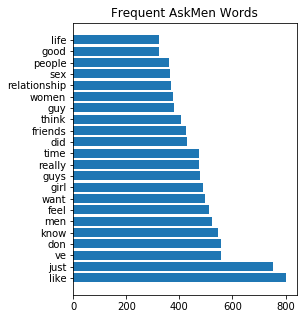

In [48]:
plt.figure(figsize=(4, 5))
plt.barh(men_words_df.index, men_words_df[0])
plt.title('Frequent AskMen Words');

In [32]:
vectorizer = TfidfVectorizer(stop_words='english')
ask_women_features = vectorizer.fit_transform(all_posts[all_posts['target']==1]['joint_words'])
ask_women_features = ask_women_features.toarray()

In [33]:
women_feat_df = pd.DataFrame(ask_women_features)

features = vectorizer.get_feature_names()

women_feat_matrix = {}
for k, v in enumerate(features):
    women_feat_matrix[v] = women_feat_df[k].sum()

sorted_women_feat_names = sorted(women_feat_matrix, key= lambda key: abs(women_feat_matrix[key]), reverse=True)

sorted_women_feat_matrix = {}
for k, v in enumerate(sorted_women_feat_names):
    sorted_women_feat_matrix[v] = women_feat_matrix[v]
    if k > 20:
        break

In [34]:
sorted_women_feat_matrix

{'like': 655.1718373949282,
 'women': 620.0855634444695,
 'did': 576.4478892504457,
 'just': 526.1305288158505,
 'feel': 449.1867796270585,
 've': 405.074701212033,
 'know': 388.77094074688443,
 'think': 377.04396384647424,
 'don': 362.6867309021185,
 'want': 351.98225361950864,
 'time': 339.63208004706826,
 'guy': 326.05946242433134,
 'people': 317.2701725278543,
 'ladies': 304.6604297196682,
 'really': 294.72923581826063,
 'men': 290.21619259609736,
 'does': 289.9494790588536,
 'love': 287.06640641055367,
 'relationship': 285.0506870460792,
 'make': 279.30308699501165,
 'things': 264.7768572008871,
 'life': 262.8646869875396}

In [35]:
women_keys = [i for i in sorted_women_feat_matrix.keys()]

women_values = [i for i in sorted_women_feat_matrix.values()]

women_words_df = pd.DataFrame(women_values, women_keys)

women_words_df

,0
like,655.171837
women,620.085563
did,576.447889
just,526.130529
feel,449.186780
ve,405.074701
know,388.770941
think,377.043964
don,362.686731
want,351.982254


Text(0.5, 1.0, 'Frequent AskWomen Words')

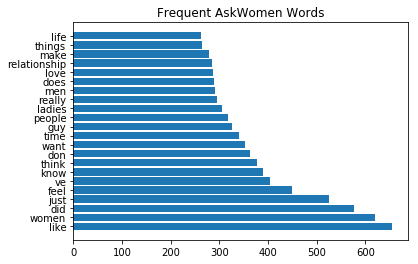

In [97]:
plt.barh(women_words_df.index, women_words_df[0])
plt.title('Frequent AskWomen Words')

## Classification Metrics

In [25]:
predicted = rf.predict(X_test_features)

metrics_df = pd.DataFrame({'actual': y_test, 'predicted': predicted})

metrics_df['true_positive'] = metrics_df.apply(lambda x: 1 if (x['actual']==1) & (x['predicted']==1) else 0, axis=1)

metrics_df['true_negative'] = metrics_df.apply(lambda x: 1 if (x['actual']==0) & (x['predicted']==0) else 0, axis=1)

metrics_df['false_positive'] = metrics_df.apply(lambda x: 1 if (x['actual']==0) & (x['predicted']==1) else 0, axis=1)

metrics_df['false_negative'] = metrics_df.apply(lambda x: 1 if (x['actual']==1) & (x['predicted']==0) else 0, axis=1)

accuracy = (metrics_df['true_positive'].sum() + metrics_df['true_negative'].sum()) / len(metrics_df)

misclassification_rate = (metrics_df['false_positive'].sum() + metrics_df['false_negative'].sum()) / len(metrics_df)

sensitivity = metrics_df['true_positive'].sum() / (metrics_df['true_positive'].sum() + metrics_df['false_negative'].sum())

specificity = metrics_df['true_negative'].sum() / (metrics_df['true_negative'].sum() + metrics_df['false_positive'].sum())

precision = metrics_df['true_positive'].sum() / (metrics_df['true_positive'].sum() + metrics_df['false_positive'].sum())

In [26]:
accuracy

0.7466016312170158

In [27]:
misclassification_rate

0.25339836878298416

In [28]:
sensitivity

0.75728

In [29]:
specificity

0.7359335038363172

In [30]:
precision

0.7412685982772123